<a href="https://colab.research.google.com/github/myingineer/pca_learning/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

# Load data sample
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [8]:
# standardize the data points
X_std = StandardScaler().fit_transform(X)

# compute the matrix of the variance-covariance
cov_X_std = np.cov(X_std.T)

# compute the eigenvectors and eigenvalues of the var-cov matrix
eig_vals, eig_vecs = np.linalg.eig(cov_X_std)

# Select the principal component to form the reduced feature space
# calculating the total sum of Eigenvalues
tot = sum(eig_vals)

# Sorting Eigenvalues in decreasing order
exp_var = sorted(eig_vals, reverse=True)

# present values as percentages
exp_var = exp_var / tot * 100

# computing and print the explained cumulative variance
cum_exp_var = np.cumsum(exp_var)

In [9]:
# construct the projection matrix from the selected k eigenvectors
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:, i]) for i in range(len(eig_vals))]
PR = np.hstack((eig_pairs[0][1].reshape(4, 1), eig_pairs[1][1].reshape(4, 1)))

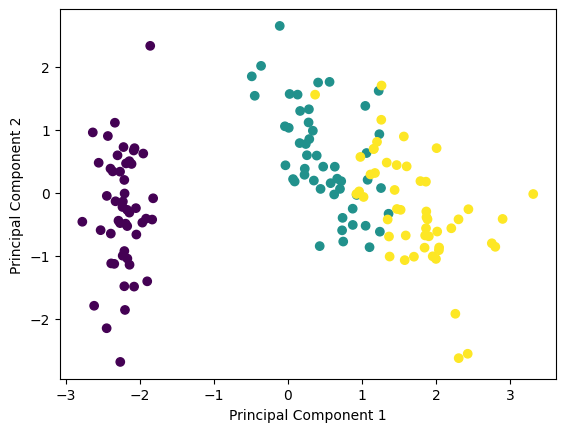

In [10]:
# project and visualize the data samples into the new reduced feature space

# Project the original data to the feature
Y = X_std.dot(PR)
YL = np.append(Y, y.reshape(150, 1), axis=1)

# plot the projected data
plt.scatter(x=YL[:, 0], y=YL[:, 1], c=YL[:, 2])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

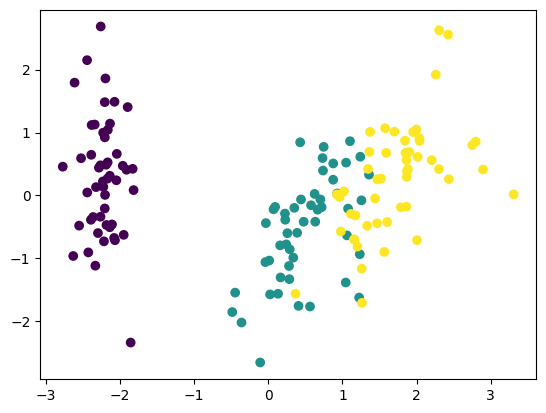

In [13]:
# Easier Way
pca = PCA().fit(X_std)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
eig_vecs = pca.components_
Y = PCA(n_components=2).fit_transform(X_std)
pca = PCA().fit(X_std)
YL = np.append(Y, y.reshape(150, 1), axis=1)
plt.scatter(x=YL[:, 0], y=YL[:, 1], c=YL[:, 2])